<a href="https://colab.research.google.com/github/jwlee95/DSP_Class2025/blob/main/Ch07_%EC%9D%B4%EC%82%B0_%EB%B0%8F_%EA%B3%A0%EC%86%8D_%ED%91%B8%EB%A6%AC%EC%97%90%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `CHAPTER 07` : 이산 및 고속 푸리에 변환 (`Discrete Fourier Transform and Fast Fourier Transform`)

##  7.1 이산 푸리에 변환(DFT)

### 7.1.1 이산 푸리에 변환의 정의

- 이산시간 푸리에 변환(DTFT)의 한계  
  - DTFT는 신호 모델링과 시스템 디자인에 큰 통찰력을 제공  
   → **but 실제적인 데이터 분석에 직접적으로 적용할 수 없음**
  
  - DTFT는 신호 $x[n]$을  $-\infty \le n \le \infty$에 대하여 알고 있다고 가정  
   → ***실제는 대부분 유한개 데이터 그것도 적은 수의 데이터에 대한 작업***
  
  - 신호 $x[n]$ 은 이산이지만 스펙트럼 $X(\Omega)$는 주파수 $\Omega$ 에 대한 연속 함수  
   → 디지털 컴퓨터를 사용한 수치적 계산 불가  

```
  ⇒ 유한개 데이터로부터 계산 가능 & 유한개 이산 주파수 스펙트럼을 만드는 푸리에 변환의 근사화 필요 → 이산 푸리에 변환
```

- 이산 푸리에 변환 (DFT )의 바탕 개념  
  - 디지털시스템 이용한 신호처리 → 신호와 스펙트럼 모두 이산이어야 함  
   → 이 전제가 충족되지 않을 경우 샘플링으로 해결  

  - 이산 신호의 경우 주파수 영역에서만 이산 스펙트럼이 되면 됨  
   → 이산 주기 신호는 만족   
     이산 비주기 신호는 불만족 → 스펙트럼을 M개로 샘플링하면 됨
  
  - M개의 이산 스펙트럼은 시간 영역에서 주기 M인 주기 신호에 대응됨  
    ∴ 구해진 푸리에 표현은 결과적으로 DTFS와 같음

  ※ **DTFS : 이산 주기 신호를 푸리에 변환한 결과 이산 주기 스펙트럼이 됨**  
    **DFT : 연속 스펙트럼을 샘플링하여 이산 스펙트럼을 얻음**  
     → **그 결과로 이에 대응되는 시간 신호가 이산 주기 신호가 됨**





---
- 이산 푸리에 변환(DFT)의 도출   
  - $N$ 샘플 이산 신호 $x[n]$($0 \le n \le N-1$로 가정)의 DTFT는
$$ X(\Omega) =  \mathfrak{F} \{ x[n] \} = \sum_{n=0}^{N-1} x[n] e^{-j\Omega n}
$$
  $X(\Omega)$를 $M$개의 샘플로 샘플링하면
$$ X_M (\Omega) = X(k\Delta \Omega) = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{M} kn} ,\;\; k=0,1, \dots , M-1
$$
  - 결과적으로 𝑵개의 신호 데이터 $x[n]$ ⇔ $M$개의 샘플 스펙트럼 $X[k]$

- 이산 푸리에 변환(DFT)의 도출

  - $X[k]$로부터 $x[n]$을 제대로 복원하기 위해서는 $M \ge N$   
    (∵ $M \lt N$ 이면 $X_M (\Omega)$을 역변환한 주기 신호 $X_M [n]$의 파형 중첩됨)  
    → 주기 신호에 대한 DTFS와 같이 취급하려면 $M=N$    
    이 경우 미지수 $N$개, 방정식 $N$ 개 연립 방정식을 푸는 문제와 동일

<img src='https://drive.google.com/uc?export=download&id=1Q7_lVH57aOvKxxELuDfm7iZMA1glgDun' width="700" height ="" /><br>    
[2판] [7-2] 스펙트럼의 샘플링에 의한 신호의 주기적 반복효과


---

- 이산 푸리에 변환(DFT) 쌍  
  - DFT  :  
$$  X[k] = \sum_{n=0}^{N-1} x[n] W_N^{kn} , \;\; k=0,1,\dots , N-1
$$
  - IDFT :  
$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] W_N^{-kn} , \;\; n=0,1,\dots , N-1
$$
  $W_N = e^{-j2\pi / N}$: `twiddle factor(회전 인자)`  


$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} \left[ \sum_{m=0}^{N-1} x[m] W_N^{km} \right] W_N^{-kn} =
\frac{1}{N} \sum_{m=0}^{N-1} x[m] \left(  \sum_{k=0}^{N-1} W_N^{k(m-n)} \right)
$$  

  - 그런데,   
$$ \sum_{k=0}^{N-1} W_N^{k(m-n)} = \left\{\begin{matrix}
\frac{1 - W_N^{(m-n)N}}{1 - W_N^{m-n}} = 0, \;\;m \ne n  \\
N, \;\; m = n
\end{matrix}\right.
$$  
  이므로    
$$ x[n] = \frac{1}{N} x[n] N = x[n]
$$  
   - $N$ 샘플 비주기 신호의 연속 스펙트럼을 등간격으로 $N$ 샘플을 취한 것   
   - $N$ 샘플 비주기 신호를 $N$-주기 신호의 한 주기 신호로 취급  
  → DTFS와 유사  
   - DTFS : $\frac{1}{N}$이 분석식, 즉 푸리에 계수 계산식에 붙음  
   - DFT : $\frac{1}{N}$이 합성식, 즉 역 DFT 식에 붙음            
     (∵ $X(\Omega)$ 의 샘플링 개념으로 유도)


---
- DFT와  $z$ 변환의 관계
  - DFT는 $z$ 평면 단위원 위에 등간격으로 위치한 $N$개의 점에서 $z$ 변환의 값을 구한 것
$$\begin{align}
X[k] &= \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N} kn} = \sum_{n=-\infty}^{\infty} x[n] \left( e^{ j\frac{2\pi}{N} k} \right)^{-n} \\
&= \sum_{n=-\infty}^{\infty} x[n] z^{-n} \Big|_{z=e^{j\frac{2\pi}{N} k}}  
= X(z) \Big|_{z=e^{j\frac{2\pi}{N} k}}
\end{align}
$$


---
### 7.1.2 회전 인자 (`Twiddle factor`)

- 회전 인자 $W_N^{kn}$     (  $W_N = e^{-j2\pi / N}$ )
  - 복소평면 단위원을 $N$등분한 점 → $W_N$이 곱해질 때마다 시계방향 회전  
  - 회전인자 $W_N^{kn}$은 주기 $N$ 인 주기 함수
$$ W_N^{kn+N} = W_N^{kn}
$$  
  - $N$이 정해지면 데이터와 상관없이 $W_N^{kn}$값들을 미리 계산 가능  
  
<img src='https://drive.google.com/uc?export=download&id=1QAsNTTvFuT4L8W7Z4N_5doim_WKoFi4h' width="400" height ="" /><br>

[2ed] 예제 7-1 : 유한구간 신호의 DFT

---

### 7.1.3 DFT를 이용한 신호 처리

- DFT를 이용한 신호 처리  

<img src='https://drive.google.com/uc?export=download&id=1QCTx78An4M5mfw4zT8z-TS33VVQVQO1a' width="700" height ="" /><br>  

<img src='https://drive.google.com/uc?export=download&id=1QDqlb4nyikLCTpmtgpHODLpzw_wgcGqM' width="700" height ="" /><br>  

>※ 신호의 길이를 유한하게 제한하면 반드시 스펙트럼의 중첩 발생  
   - $N$을 충분히 크게 잡아서 스펙트럼이 중첩되는 부분이 작게  
    → but 계산량 부담
   - 신호 왜곡이 작도록 자른 뒤 0 데이터를 추가  (Zero-padding)
    → 신호 반복 주기에 완충지대 확보


---   
#### [Zero-padding Effects]    **구형파(Rectangular Pulse)의 주파수 분석**.

시간 영역에서 사각형 모양의 신호는 주파수 영역에서 **Sinc 함수**($\frac{\sin(x)}{x}$) 형태가 되는데, Zero-padding에 의하여 스펙트럼의 형태가 어떻게 변하는지를 살펴 봄.


가상의 데이터 `[1, 1, 1, 1]` (길이 4)가 있다고 가정.

  * **Case A: Zero-padding 없음 (4-point DFT)**
      * 데이터 개수만큼만 주파수 샘플이 나옴. (점 4개)  
      * 결과: 점이 너무 적어서 이것이 Sinc 함수 모양인지, 그냥 zig-zag인지 전혀 알 수 없음.
  * **Case B: Zero-padding 적용 (32-point DFT)**
      * 뒤에 0을 28개 붙여 총 길이를 32로 만듬.
      * 결과: 점 4개 사이에 촘촘하게 점들이 채워집니다. 이제야 비로소 **물결치는 Sinc 함수의 곡선**이 선명하게 보이게 됨.



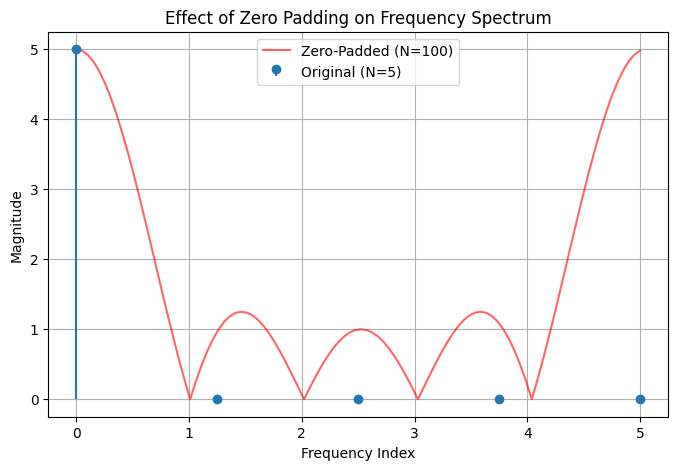

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 원본 신호 (짧은 구형파)
x = np.array([1, 1, 1, 1, 1])  # 데이터 길이 N=5

# 2. Case A: Zero-padding 없음 (5-point FFT)
# 데이터 길이 그대로 FFT 수행
fft_original = np.fft.fft(x)
mag_original = np.abs(fft_original)

# 3. Case B: Zero-padding 적용 (100-point FFT)
# 뒤에 0을 채워서 길이를 100으로 늘림 (N=100)
fft_padded = np.fft.fft(x, n=100)
mag_padded = np.abs(fft_padded)

# --- 시각화 ---
plt.figure(figsize=(8, 5))

# 패딩된 결과 (부드러운 곡선) - 먼저 그립니다 (배경 역할)
plt.plot(np.linspace(0, 5, 100), mag_padded, 'r-', alpha=0.6, label='Zero-Padded (N=100)')

# 원본 결과 (듬성듬성한 점)
plt.stem(np.linspace(0, 5, 5), mag_original, basefmt=" ", label='Original (N=5)')

plt.title('Effect of Zero Padding on Frequency Spectrum')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

- 출력 그래프를 보면,   
 파란 점 (Original): 듬성듬성 찍혀 있어서 신호의 전체적인 주파수 특성을 파악하기 어려움.   
 빨간 선 (Zero-Padded): 파란 점들을 정확히 통과하면서 부드럽게 이어지는 곡선으로 표현됨.   

- 이것이 바로 **스펙트럼 보간**`Spectral Interpolation` 효과임.    

- 빨간 선이 파란 점들 사이를 연결해 주었지만, 파란 점이 가지고 있던 정보 자체가 바뀐 것은 아님. 이것이 "해상도는 좋아 보이지만, 물리적 분해능은 같다"는 말의 의미임.

---  

<img src='https://drive.google.com/uc?export=download&id=1QFmlAkzsx5Q8zhkL0QMIkOxuUKwuMXoO' width="600" height ="" /><br>  


<img src='https://drive.google.com/uc?export=download&id=1QEVYueW7wgqo4jGx0aOkQqYeTd4qTxE2' width="600" height ="" /><br>  

---

## 7.2 이산 푸리에 변환의 특성

### 7.2.1 DFT의 기본 성질

- DFT의 기본 성질 : DTFS 및 DTFT와 매우 비슷함  

 <img src='https://drive.google.com/uc?export=download&id=1QGOf07f-SG6tLRSNcT3wbIuYpqgP4GYb' width="700" height ="" /><br>  

 ---

### 7.2.2 동일 구조에 의한 IDFT의 계산

- 동일 구조에 의한 IDFT의 계산  
  - $X[k]$과 $x[n]$ 계산에 동일한 알고리즘을 사용하기 위한 변형 가능함
  - 복소수 계산의 성질 $(a+b)^* = a^* + b^* , (ab)^* = a^* b^*$을 적용하면   
$$ x^* [n] = \left( \frac{1}{N} \sum_{k=0}^{N-1} X[k] W_N^{-kn} \right)^*
= \frac{1}{N} \sum_{k=0}^{N-1} X^* [k] W_N^{kn}  \\
x[n] = (x^* [n])^* = \frac{1}{N} \left(  \sum_{k=0}^{N-1} X^* [k] W_N^{kn} \right)^*
$$                
  → $x[n]$ 대신 $X[k]$가 입력인 점을 제외하고는 DFT 알고리즘과 동일


- 변형 IDFT 알고리즘   
 <img src='https://drive.google.com/uc?export=download&id=1QI6splm3cXXWXMWGfPxArSfSvDtKFDHl' width="700" height ="" /><br>

---
<img src='https://drive.google.com/uc?export=download&id=1QL6oKE2FQUMikDedVv_mV55082Us1W96' width="700" height ="" /><br>  


<img src='https://drive.google.com/uc?export=download&id=1QKhbTgvfocNlBBTeMqVvpzcZpefwA1MD' width="600" height ="" /><br>

---






### 7.2.3 DFT의 해상도와 영-채우기 (`zero padding`)

- 영-채우기(`zero padding`)와 해상도  
  - DFT의 울타리 효과(`picket fence effect`) → 스펙트럼 샘플의 간격이 넓으면 문제됨  
  - DFT에 의한 스펙트럼 해상도 → $x[n]$의 샘플 수($N$)에 의존
$$ \Delta \Omega = \frac{2\pi}{N} \text{ or } \Delta F = \frac{1}{N}
$$
  - 더 높은 주파수 해상도가 요구되면 더 많은 데이터 샘플을 사용해야 함   

> **울타리 효과**(**Picket Fence Effect**)는 DFT(또는 FFT)가 주파수 스펙트럼을 연속적으로 보여주는 것이 아니라, 특정 지점(Bin)에서만 띄엄띄엄 샘플링하기 때문에 발생하는 현상.
>
>다시 말해, `우리가 보고 싶은 신호의 진짜 피크(Peak)가 DFT가 샘플링하는 지점과 지점 사이(빈 사이)에 숨어버려, 그 크기를 정확히 측정하지 못하는 현상`을 말함.
`

- 영-채우기(`zero padding`)와 해상도  
  - $N_1$개의 유효 데이터 but 주파수 영역에서 $N_2$ 샘플이 요구될 경우  
    (요구되는 주파수 해상도 $\Delta \Omega = \frac{2\pi}{N_2}$  )  
   → 강제로 데이터 샘플 수를 증가시켜야 함 → $N_2 - N_1$개의 0을 첨가  
    ( ∵ 데이터 수는 증가시키되 스펙트럼 형태 변화는 생기지 않도록 )

  - **영 채우기에 의한 해상도 증가는 스펙트럼 정확도를 증가시키지 않음**      
   → 관찰의 정확성은 신호의 유효 샘플 수 $N_1$을 더 늘려야 함  
    ∵ 유효 샘플 수 $N_1$의 증가 → 해상도 향상 and 주파수 중첩 감소


---  
### DFT의 길이 $N$의 선정

- DFT의 길이 $N$의 선정  
  - 연속신호(지속시간 )를 간격 로 샘플링시 주파수중첩 피하기 위한 조건  
$$ f_s = \frac{1}{T} \ge 2f_b
$$
  - DFT에 의해 얻어진 샘플 스펙트럼의 샘플간 간격(해상도)
$$ \Delta f = \frac{\text{한 주기 구간에 해당하는 주파수}}{\text{샘플 개수}} = \frac{f_s}{N} = \frac{1}{NT}
$$
  - 샘플 스펙트럼을 IDFT한 이산 신호의 파형 중첩 없을 조건 : $NT \ge t_s$  
  - 시간 및 주파수 영역 양쪽에서 중첩 피하려면  
$$ N \ge 2 t_s f_b
$$  
  ⇒ ***$N$은 최소한 시간-대역폭 곱의 두 배 이상은 되어야 함***


---  
<img src='https://drive.google.com/uc?export=download&id=1QLUCvjtm0gfSWAwq0WfpftTRhrqk7gUb' width="700" height ="" /><br>

---

## 7.3 원형 컨벌루션

### 7.3.1 원형 컨벌루션의 개념과 정의

- 원형 컨벌루션(주기 컨벌루션)의 개념  
  - DFT : 시간 영역의 관점에서는 주기 신호에 대한 변환으로 해석 가능  

  - 주기 신호들의 선형 컨벌루션 → 그 컨벌루션 결과가 수렴하지 않음

  - $N$-주기 신호 2개의 컨벌루션 → 결과가 $N$스텝마다 주기적으로 반복  
   ∴ 신호의 1주기 값을 이용한 컨벌루션 정의 가능  → 원형 컨벌루션

- 원형 컨벌루션  
  - 같은 길이의 주기 신호의 한 주기에 대한 컨벌루션  
  
  - 컨벌루션 : $x[n]$을 고정,$h[n]$을 뒤집어 이동시키며 계산 수행함  
   → $N$번 이동 후 처음과 같은 상황 ⇒ $N$-주기적 → ∴ 주기 컨벌루션
  
  - 신호는 주기적으로 반복된다고 보고 곱한 값을 더하는 계산만 한 주기 구간에서 수행
$$y[n] = \sum_{m=0}^{N-1} x[m] h[n-m] = x[n] \circledast h[n]
$$
  - ***원형 컨벌루션은 두 데이터의 크기가 같아야만 수행 가능***


---

- 원형 컨벌루션의 도해적 이해  
  - $N$-주기 신호 : $N$샘플을 원 위에 등간격으로 배치하여 한 점씩 회전시킨 것과 같음

<img src='https://drive.google.com/uc?export=download&id=1QMgZk3P5Y9ygLsVncGDkF2hXHckQRmdW' width="400" height ="" /><br>



---
- $N$-주기 신호 $x[n]$과 $h[n]$의 컨벌루션  

<img src='https://drive.google.com/uc?export=download&id=1QPQB4VIigUGwaEh3AC1IGvVanDOzZbUg' width="650" height ="" /><br>  

- 원형 컨벌루션과 선형 컨벌루션의 관계

  - 원형 컨벌루션 결과 $\ne$ 선형 컨벌루션 결과  
  
  - 각각 $N$ 샘플을 갖는 두 수열의 **원형 컨벌루션**결과 → $N$샘플 수열  
  
  - $N_1$샘플과 $N_2$샘플 수열의 **선형 컨벌루션** → $( N_1 + N_2 -1 )$ 샘플 수열

- 원형 컨벌루션과 DFT의 관계  
  - 원형 컨벌루션과 신호의 DFT 간에는 시간 컨벌루션 성질 성립
$$ y[n] = x[n] \circledast h[n] \Leftrightarrow Y[k]=X[k]H[k]
$$  

   → 원형 컨벌루션은 DFT를 이용한 신호와 시스템의 취급에 적합  
   → 원형 컨벌루션의 효율적 계산  
   $x[n], h[n]$의 DFT 수행  → $Y[k]=X[k]H[k]$ 계산  → IDFT 수행 $y[n]$




---
 <img src='https://drive.google.com/uc?export=download&id=1QPuVF9BV5SM_12RpUo3k7BQHZ2A1lqat' width="700" height ="" /><br>  

 ---

### 7.3.2 원형 컨벌루션에 의한 선형 컨벌루션 계산

- 원형 컨벌루션을 이용한 선형 컨벌루션 계산  
  - $N_1$ 샘플 & $N_2$ 샘플 수열의 선형 컨벌루션을 원형 컨벌루션 이용해 계산  
    
  → 결과가 ($N_1 + N_2 + 1$)샘플이므로 컨벌루션될 수열도 ($N_1 + N_2 - 1$) 샘플  
    ∴ 모자라는 만큼(각각 $N_2 -1, N_1 - 1$개) 영 채우기를 해야 함.  

<img src='https://drive.google.com/uc?export=download&id=1QQbK3n2AmlRWYjDwjdkZv3_cWol5XThM' width="700" height ="" /><br>




---  
#### DFT를 이용한 선형 컨벌루션 계산

- DFT를 이용한 선형 컨벌루션 계산  
  - 입/출력 데이터 길이를 일치시키면 DFT쌍을 이용하여 원형 컨벌루션 계산을 수행해서 선형 컨벌루션 계산 가능함  
  - 길이 ($N_1 + N_2 -1$) 이 되도록 영 채우기한 다음 DFT & IDFT  

<img src='https://drive.google.com/uc?export=download&id=1QSSXFvYUVx84lyY53K1gcug_Wc0ZQ9Y0' width="700" height ="" /><br>




---  

### 7.3.3 원형 컨벌루션을 이용한 긴 데이터의 컨벌루션

- 원형 컨벌루션을 이용한 긴 데이터의 (선형) 컨벌루션 계산  
 - 시스템의 입출력 관계  →  선형 컨벌루션  
   → 장시간 동작시 입력 신호가 매우 길어서 바로 원형 컨벌루션 곤란
  
  - 입력신호를 적당한 크기의 구간으로 나누어 N-샘플 원형컨벌루션 수행
  
  -  $n_0$순간의 입력값 $x[n_0 ]$은 임펄스 응답 $h[n]$의 지속시간만큼 출력에 영향을 미침  
   → $h[n]$이 $M$ 샘플이면 입력값 $x[n_0 ]$은 $n_0 +M-1$ 까지의 출력에 기여함
  
 ∴ 임펄스 응답의 지속시간에 의한 영향을 어떻게 고려하느냐가 관건  
   → 중복-더하기 방법 : 계산 후에 반영  
   → 중복-저장 방법 : 계산 전에 반영


---  

- 중복-더하기 방법  
 - 입력을 중복 없이 길이 로 나누어 블록별로 원형 컨벌루션 수행 & 각각의 결과를 더함  
  ∵ 지금 구간의 입력에 의한 다음 구간 출력에의 기여분이 다음 구간 입력과 임펄스 응답의 원형 컨벌루션에는 포함되어 있지 않기 때문  

<img src='https://drive.google.com/uc?export=download&id=1QTDc3izgMA4j7LZsODjxpsCXXqROG7M3' width="600" height ="" /><br>



- 중복-더하기 방법  
  - 1) $h[n]$에 $L-1=N-M$개의 영점 채우기  
$$ h_a [n] = \left\{\begin{matrix}
h[n], \;\; 0 \le n \le M-1 \\
0, \;\;\; M \le n \ N-1
\end{matrix}\right.
$$
  - 2) $x[n]$을 중복 없이 길이 $L$로 나누어 각각에 $M-1$개 영점 채우기 시행  
$$ x_i [n] = \left\{\begin{matrix}
x[n], \;\; iL \le n \le iL+L-1 \\
0, \;\;\; iL+L \le n \ iL+N-1
\end{matrix}\right.
$$
  - 3) DFT와 IDFT를 이용하여 $N$-샘플 원형 컨볼루션 수행      
$$ y_i [n] = x_i [n] \circledast h_a [n], \;\;\; iL \le n \le iL+N-1
$$  
  - 4)각각의 원현 컨볼루션 수행 결과를 그대로 더함.  
$$ y [n] = x[n] \circledast h [n] = \sum_{i=0}^{\infty} y_i [n]
$$  
 $\Rightarrow iL+L \le n \ iL+N-1$ 구간에서는 $y_i [n]$과 $y_{i+1} [n]$의 중복이 생김.    
   → $y_i[n] : x[n], \;\; iL \le n \le iL+L-1 $ (과거 입력)에 의한 응답 성분  
   → $y_{i+1}[n] : x[n], \;\; iL+L \le n \le iL+N-1$ (현재 입력)에 의한 응답 성분  

<img src='https://drive.google.com/uc?export=download&id=1QZyNDrh8SZKvf9iHgHiLLWINVcaOJk7j' width="600" height ="" /><br>


<img src='https://drive.google.com/uc?export=download&id=1QWioOJx8Fix3_FVYwCRnBkzZY2FztD1T' width="600" height ="" /><br>  

---



- 중복-저장 방법  
 - 입력을 임펄스 응답의 지속시간만큼 중복되도록 길이 $N=L+M-1$ 으로 나누어 블록별로 원형 컨벌루션을 수행  
  → 각각의 결과에서 앞의  샘플을 버린 뒤 더함
      
 ∵ 앞부분의 중복되는 $M-1$ 입력 샘플 구간의 원형 컨벌루션 결과는 과거 입력의 영향이 반영되지 않은 불완전한 출력이기 때문

  - 1) $h[n]$에 $L-1=N-M$개의 영점 채우기 시행  
$$ h_a [n] = \left\{\begin{matrix}
h[n], \;\; 0 \le n \le M-1 \\
0, \;\;\; M \le n \ N-1
\end{matrix}\right.
$$  
  - 2) $x[n]$을 $M-1$샘플씩 중복되게 길이 $N$으로 나눔  
  →  첫 블록은 중복 샘플 없으므로 맨 앞부분에 $M-1$개의 영점을 채움  
$$  x_0 [n] = \left\{\begin{matrix}
0, \;\; -M+1 \le n \le -1 \\
x[n], \;\;\; 0 \le n \ L-1 \\
\end{matrix}\right. \\
x_i [n] = x[n],  \;\; iL-M+1 \le n \le iL+L-1
$$  
  - 3) DFT와 IDFT를 이용하여 $N$-샘플 원형 컨볼루션 수행      
$$ y_i [n] = x_i [n] \circledast h_a [n], \;\;\; iL-M+1 \le n \le iL+L-1
$$  
  - 4)각각의 원현 컨볼루션 수행 결과를 그대로 더함.  
$$  \bar{y_i} [n] = \left\{\begin{matrix}
0, \;\; iL-M+1 \le n \le iL-1 \\
y_i [n], \;\;\; iL \le n \ iL+L-1 \\
\end{matrix}\right. \\
 y [n] = x[n] \circledast h [n] = \sum_{i=0}^{\infty} \bar{y_i} [n]
$$  
 $\Rightarrow iL-M+1 \le n \ iL-1$ 구간에서는 $y_{i-1} [n]$과 $y_i [n]$의 중복이 생김.    
   → $y_{i-1}[n] : x[n], \;\; iL-2(M-1) \le n \le iL-1 $에 대한 응답 성분  
     - 과거 입력의 영향이 완전히 반영된 출력     

   → $y_i[n] : x[n], \;\; iL-M+1 \le n \le iL-1$ 에 의한 응답 성분  
    - 입력 $x[n], iL-2(M-1) \le n \le iL-M$의 영향이 빠진 출력  

    $\Rightarrow y[n]$에서는 $M-1$샘플이 지나야 과거 입력 영향까지 완전히 반영됨.  
    ∴ $y_i [n]$의 앞부분 $M-1$샘플을 버림    

<img src='https://drive.google.com/uc?export=download&id=1QilUpcmYmRLMVRENag22yswLqORHdhdM' width="600" height ="" /><br>

<img src='https://drive.google.com/uc?export=download&id=1QeKobVkkmM4PLrObeY2pVP9trMhDFnFS' width="600" height ="" /><br>  

---

## 7.4 고속 푸리에 변환(FFT)

### 7.4.1 DFT의 계산

- DFT의 계산  
  - DFT계산은 $N$-샘플 $x[n] \; \leftrightarrow N$-샘플 $X[k]$간의 대수 방정식 계산 문제임.    
$$ \left\{\begin{align}
DFT: X[k] &= \sum_{n=0}^{N-1} x[n]W_N^{kn}, \;\;k=0,\dots , N-1\\
IDFT: x[n] &= \frac{1}{N} \sum_{k=0}^{N-1} X[k]W_N^{-kn}, \;\;k=0,\dots , N-1
\end{align}\right.
$$  
  - 직접계산시의 계산량(곱셈 `X`과 덧셈`+`의 수)  
$$ X[k] = x[0]W_N^0 + x[1]W_N^k + x[2]W_N^{2k} + \dots + x[N-1]W_N^{(N-1)k}
$$  
  → 각 $k$당 $N$번의 복소수 곱셈과 $N-1$번의 복소수 덧셈  
  → 총 $N^2$번의 복소수 곱셈과 $N(N-1)$번의 복소수 덧셈  
  → $N$이 커지면 계산량이 엄청 늘어남  $\Rightarrow$ **효과적인 계산 방법이 요구됨**...  
  
  - $W_N^{kn}$은 $0 \le kn \le (N-1)^2$의 항 $\rightarrow$ 실제로 $N$개의 서로 다른 값만 존재  
  - DFT계산시 다음의 $W_N^{kn}$의 성질을 이용하면 계산량을 줄일 수 있음
$$ \left\{\begin{align}
\text{대칭성} &: W_N^{k(N-n)} = \left( W_N^{kn} \right)^*\\
\text{주기성} &: W_N^{kn} = W_N^{k(n+N)} =  W_N^{(k+N)n}
\end{align}\right.
$$   
  → `Cooley & Tukey` 고속 푸리에 변화(Fast Fourier Transform: FFT)  


- 고속 푸리에 변환(`FFT`)  
  - DFT를 효과적으로 계산하기 위한 알고리즘  
  - 주어진 신호를 여러 개의 길이가 짧은 신호로 분할하여 분할된 신호들의 DFT를 구한 후 그 결과들을 적절하게 결합하여 원래 주어진 신호의 DFT를 수행  




---
**DFT의 회전 인자(Twiddle Factor) $W_N$의 주기성과 대칭성 성질**.

$$
\begin{aligned}
1).\quad & W_N^{k(N-n)} = W_N^{kN} \cdot W_N^{-kn} = (W_N^{kn})^* \\
2).\quad & W_N^{k(n+N)} = W_N^{kn} \cdot W_N^{kN} = W_N^{kn} \\
3).\quad & W_N^{(k+N)n} = W_N^{kn} \cdot W_N^{Nn} = W_N^{kn}
\end{aligned}
$$

이 성질들은 $W_N = e^{-j\frac{2\pi}{N}}$ 일 때, **$W_N^N = 1$** 이라는 점을 이용한 것임.

1.  **대칭성 (Symmetry):** (1)은 켤레 복소수(Conjugate) 성질을 보여줌.  
$W_N^{kN} = 1$이므로 $W_N^{-kn}$만 남게 되고, 이는 $W_N^{kn}$의 켤레 복소수와 같음.
2.  **주기성 (Periodicity):** (2,3)은 $W_N$이 시간 인덱스 $n$이나 주파수 인덱스 $k$가 $N$만큼 증가해도 값이 변하지 않고 원래 값과 같음(주기 $N$)을 의미함.


---
>[참고]   **Discrete Fourier Transform** (**DFT**)는 선형 변환(Linear Transformation)의 일종이므로, 입력 신호와 출력 신호의 관계를 **행렬의 곱(Matrix Multiplication)** 형태로도 표현할 수 있음.
>
> 신호 처리에서 DFT를 행렬로 이해하는 것은 주파수 분석의 수학적 구조를 파악하는 데 매우 중요.
>
> **1. 기본 정의**
>
> 길이가 $N$인 이산 시간 신호 $x[n]$의 $N$-point DFT는 다음과 같이 정의함.
>
>$$X[k] = \sum_{n=0}^{N-1} x[n] W_N^{kn}, \quad k = 0, 1, ..., N-1$$
>
>여기서 **Twiddle Factor (회전 인자)** $W_N$은 다음과 같음.
>
>$$W_N = e^{-j\frac{2\pi}{N}}$$
>
> **2. 행렬 방정식 (Matrix Equation)**
>
>위의 합(summation) 공식을 벡터와 행렬로 나타내면 다음과 같음.
>
>$$\mathbf{X} = \mathbf{W} \mathbf{x}$$
>
>* **$\mathbf{x}$ (입력 벡터):** 시간 영역의 신호 $[x[0], x[1], \dots, x[N-1]]^T$
>* **$\mathbf{X}$ (출력 벡터):** 주파수 영역의 성분 $[X[0], X[1], \dots, X[N-1]]^T$
>* **$\mathbf{W}$ (DFT 행렬):** $N \times N$ 크기의 대칭 행렬 (Vandermonde Matrix 형태)
>
>> **반데르몬드 행렬**(**Vandermonde Matrix**)은 각 행(Row)이 **등비수열**(Geometric Progression)의 형태를 이루는 매우 독특한 행렬을 의미함.
선형대수학뿐만 아니라, DSP(디지털 신호 처리) 분야, 특히 DFT(이산 퓨리에 변환) 행렬의 기본이 되는 형태임.   

> **3. DFT 행렬 ($\mathbf{W}$)의 구조**
>
>DFT 행렬 $\mathbf{W}$의 각 요소는 $W_N^{kn}$으로 채워짐. ($k$는 행, $n$은 열 인덱스)
>
>$$
\mathbf{W} =
\begin{bmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & W_N^1 & W_N^2 & \dots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \dots & W_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & W_N^{N-1} & W_N^{2(N-1)} & \dots & W_N^{(N-1)(N-1)}
\end{bmatrix}
$$   
>   
> **4. 구체적인 예시: $N=4$ 일 때**
>
> 4-point DFT의 경우, $W_4 = e^{-j\frac{2\pi}{4}} = e^{-j\frac{\pi}{2}} = -j$ .  따라서 행렬은 다음과 같이 표현 됨.
>
>$$
\mathbf{W}_4 =
\begin{bmatrix}
W^0 & W^0 & W^0 & W^0 \\
W^0 & W^1 & W^2 & W^3 \\
W^0 & W^2 & W^4 & W^6 \\
W^0 & W^3 & W^6 & W^9
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -j & -1 & j \\
1 & -1 & 1 & -1 \\
1 & j & -1 & -j
\end{bmatrix}
$$
>
> **5. IDFT (역변환) 행렬**
>
> Inverse DFT(IDFT) 행렬은 DFT 행렬의 **켤레 복소수**(**Conjugate**)를 취하고 $N$으로 나눈 것과 같음.  
이는 DFT 행렬이 직교성(Orthogonality)을 가지기 때문임.
>
>$$\mathbf{W}^{-1} = \frac{1}{N} \mathbf{W}^*$$
>
>따라서, $\mathbf{x} = \mathbf{W}^{-1} \mathbf{X} = \frac{1}{N} \mathbf{W}^* \mathbf{X}$ 가 성립함.
>
> **6. 계산 복잡도 참고**
>
>* **행렬 곱셈 방식:** $N \times N$ 행렬과 벡터의 곱이므로 연산량은 **$O(N^2)$**임.
> * **FFT (Fast Fourier Transform):** 행렬의 대칭성과 주기성을 이용하여 동일한 결과를 **$O(N \log N)$**의 연산량으로 계산함. 따라서 실제 구현에서는 행렬 곱을 직접 사용하기보다 FFT 알고리즘을 사용함.


---  

### 7.4.2 FFT의 원리 - 밑수 2 시분할(`decimation-in-time`) `FFT`   
  - $N=2^q$인 경우 DFT계산을 $x[n]$의 짝수항과 홀수항으로 나누면    
$$ \begin{align}
X[k] = \sum_{n=0}^{N-1} x[n]W_N^{kn} &= \sum_{n=even} x[n]W_N^{kn} + \sum_{n=odd} x[n]W_N^{kn}   \tag{7.29}\\  
&= \sum_{r=0}^{(N/2)-1} x[2r]W_N^{2rk} + \sum_{r=0}^{(N/2)-1} x[2r+1]W_N^{(2r+1)k}  \tag{7.30} \\
&=  \sum_{r=0}^{(N/2)-1} g[r](W_N^2)^{rk} + W_N^k \sum_{r=0}^{(N/2)-1} h[r](W_N^2)^{rk}
\end{align} \\
$$  
  여기서 $g[r] = x[2r], \;h[r]=x[2x+1]$.   

  - 그런데, $W_N^2 = \left(  e^{-j \frac{2\pi}{N}} \right)^2 = e^{-j \frac{2\pi}{N/2}} = W_{N/2}$이므로   
$$ \begin{align}
X[k]  &= \sum_{r=0}^{(N/2)-1} g[r] W_{N/2}^{rk} + W_N^k \sum_{r=0}^{(N/2)-1} h[r] W_{N/2}^{rk}   \tag{7.32} \\
&= G[k] + W_N^kH[k]
\end{align}
$$  

- $G[k]$와 $H[k]$는 $\frac{N}{2}$점 DFT    
   $\Rightarrow k=0,1,\dots , \frac{N}{2}-1$까지의 $X[k]$만 계산 가능  
  $\Rightarrow$ $G[k]$와 $H[k]$가 $\frac{N}{2}$-주기 함수임을 이용하여 해결  

$$  X[k] = G[k] + W_N^kH[k], \;\;  k=0,1,\dots , \frac{N}{2}-1  \tag{7.33a} \\
\begin{align}
X[k+N/2]  &=  G[k+N/2] + W_N^{k+N/2}H[k+N/2]     \\
&= G[k] + W_N^{k+N/2}H[k], \;\; k=0,1,\dots , \frac{N}{2}-1  \tag{7.33b}
\end{align}
$$  
  → $N$-샘플 DFT문제는 두 개($G[k], H[k]$)의 $\frac{N}{2}$-샘플 DFT문제로 바뀜  
  → 계산량: $\frac{N}{2}$점 DFT계산에 $\left( \frac{N}{2} \right)^2$의 곱셈& 두 DFT 결합에 $N$의 곱셈   
  ∴ 총 $\left( \frac{N^2}{2} \right)+N$의 곱셈 필요 → 직접 계산($N^2$)에 비해 절반 수준


<img src='https://drive.google.com/uc?export=download&id=1QoiBd7_ROzZMzKXDYGgBN3RzNtv3yyRX' width="550" height ="" /><br>

- 다시 $\frac{N}{2}$-샘플 DFT를 $\frac{N}{4}$-샘플 DFT로 분할하면   
 여기서 $x[n]$에 대해 표현되도록 $g[2l] = x[4l]$, $g[2l+1] = x[4l+2]$, $h[2l] = x[4l+1]$, $h[2l] = x[4l+3]$를 사용함.
$$ G[k]  = \sum_{l=0}^{(N/4)-1} x[4l] W_{N/4}^{lk} + W_{N/2}^k \sum_{l=0}^{(N/4)-1} x[4l+2] W_{N/4}^{rk}  \\
H[k]  = \sum_{l=0}^{(N/4)-1} x[4l+1] W_{N/4}^{lk} + W_{N/2}^k \sum_{l=0}^{(N/4)-1} x[4l+3] W_{N/4}^{rk}
$$  
  여기서, 회전인자는 $W_{N/2} = W_N^2$관계를 이용, $W^{k}_{N/2} = W_N^{2k}$로 변경하면  
  → $\frac{N}{4}$-점 DFT계산에 $\left( \frac{N}{4} \right)^2$의 곱셈 & 두 DFT 결합에 $\frac{N}{2}$의 곱셈  
  ∴ 총 $\left( \frac{N^2}{4} \right)+N+N$의 곱셈 필요   
  → 이를 계속해서 재분할하면 궁극적으로 2-샘플 DFT의 계산으로 됨  

<img src='https://drive.google.com/uc?export=download&id=1QqGkwknIgGvkAp8IZiKShY_8LQ17Ho9u' width="500" height ="" /><br>
    
그림7-21 밑수 2 시분할 FFT 선도(N=8)    

-
  - $N=2^q$를 2점 DFT로 분할하려면, $ log_2 N = q$의 분할 과정이 필요함  
  → 계산량: $N$점 DFT → $\frac{N}{2}$점 DFT → $\frac{N}{4}$점 DFT → $\cdots$ → 2점 DFT    

$$ N^2 \rightarrow N+2\left( \frac{N}{2} \right)^2 \rightarrow
  N+N+4\left( \frac{N}{4} \right)^2 \;\; \rightarrow \cdots \rightarrow \; N\log_2 N
$$

> 예 $N=2^{10}=1024$이 경우  
  - 직접 DFT 계산 : $N^2 = 1,048,576$의 곱셈   
  - FFT 계산 : $N\log_2 N = 10,248$의 곱셈







---  
### 7.4.3  FFT 버터플라이(butterfly) : FFT 선도의 기본 구조  
  - $N(=2^q)$점 FFT : $q$ stage를 갖고 각 stage마다 $N$개씩의 입/출력  
  - 각 stage의 기본적인 계산 형태는 `butterfly` 모양으로 이루어져 있음  
  → 각 stage마다 $\frac{N}{2}$개의 butterfly → 총 $q \left( \frac{N}{2}\right)$개의 butterfly로 구성  

<center>
<img src='https://drive.google.com/uc?export=download&id=1Qr_1GtXhJeplpB2GesBRuBCVPEwED1Xf' width="" height ="" /><br>

$$
\left\{ \begin{matrix}
  X_{m+1} [i]  = X_m [i]  + W_N^r X_m [j] \\
  X_{m+1} [j]  = X_m [i]  + W_N^{r+N/2} X_m [j]
\end{matrix}\right.  \Rightarrow \text{2번의 곱셈이 필요}
$$  

  
  - 여기서 회전 인자의 지수$r$: stage 1에서는 →0,  stage 2에서는 →0,2, stage 3에서는  → 0,1,2,3,$\cdots$  
  그런데,  
  $$ W_N^{r+ \frac{N}{2}} = W_N^r W_N^{\frac{N}{2}} = -W_N^r \;\;
  ( \because W_N^{\frac{N}{2}} = e^{-j \frac{2\pi}{N} \frac{N}{2}} = -1)
  $$이므로   
$$ \left\{ \begin{matrix}
  X_{m+1} [p]  = X_m [p]  + W_N^r X_m [q] \\
  X_{m+1} [q]  = X_m [p]  - W_N^r X_m [q]
\end{matrix}\right. \rightarrow W_N^r \text{분리} \rightarrow \text{1번의 곱셈이 필요}
$$  
   → 개선된 butterfly 얻음 → 이 경우 계산량 $\left(  \frac{N}{2}\right) \log_2 N$   

<center>
 <img src='https://drive.google.com/uc?export=download&id=1Qs4SzQfpF3IOhTjH5iy7kNNWlHlW32hu' width="" height ="" /><br>  

---
<center>
<img src='https://drive.google.com/uc?export=download&id=1QuiliZdNMU4ucS42MGMRxmrpDbabS5mL' width="" height ="" /><br>  


---

### 역비트순 (bit-reversed order)

- 역비트순 (bit-reversed order)  
  - FFT 선도에서 입력의 나열이 순서적이지 않음 → 규칙성 존재?
  - 시간 변수 $n$을 2진수로 바꾼 뒤, 비트 순서를 역으로 하여 다시 심진수로 표시  
  → 입력 수열을 계속적으로 두 개의 반쪽 수열로 나누는 과정에서 비롯 됨   

<center>
<img src='https://drive.google.com/uc?export=download&id=1Qy9Ll6eu188n1ixAJLhAwATbNW4XePDZ' width="" height ="" /><br>  


<img src='https://drive.google.com/uc?export=download&id=1Qz099GSn1Fcfktce13AdtEzgtAHAndUU' width="" height ="" /><br>  




---
- FFT의 변형  
  - FFT 선도에서 node의 연결성만 확보되면 순서가 바뀌어더 결과는 동임.

<center>
<img src='https://drive.google.com/uc?export=download&id=1QzYe7opU4mRBRHtNsgEgCr1rg0Mn1qus' width="" height ="" /><br>  

---

### 밑수 2 주파수 분할 `FFT`

- 주파수 분할 `FFT`  
  - 시분할 FFT : 입력 $x[n]$을 작은 수열로 분할  
  주파수 분할 FFT : 출력 $X[k]$를 작은 수열로 분할  
  - 시분할 FFT와 쌍대적 관계  
  → 시분할 FFT를 전치(입/출력 마디를 교환 & 화살표 방향을 반대)하여 얻을 수 있음.
$$ \begin{align}
X[k]  &= \sum_{n=0}^{(N/2)-1} x[n] W_N^{nk} + \sum_{n=N/2}^{N-1} x[n] W_N^{nk} \\
&= \sum_{n=0}^{(N/2)-1} x[n] W_N^{nk} + W_N^{(N/2)k} \sum_{n=0}^{(N/2)-1} x[n+\frac{N}{2}] W_N^{nk}
\end{align}
$$    
  그런데, $W_N^{\frac{N}{2}k} = e^{-j \frac{2\pi}{N} \frac{N}{2}k} = (-1)^k$이므로  
$$ X[k] = \sum_{n=0}^{(N/2)-1} \left[ x[n]  + (-1)^k x[n+\frac{N}{2}]  \right] W_N^{nk}
$$  
  $k$가 짝수와 홀수인 경우를 나누면, $W_N^{2rn} = W_{N/2}^{rn}$이므로  
$$\begin{align}
X[2r] &= \sum_{n=0}^{(N/2)-1} \left[ x[n] + x[n+\frac{N}{2}]  \right] W_N^{2rn} \\
&= \sum_{n=N/2}^{(N/2)-1} g[n] W_{N/2}^{rn} \\
X[2r+1] &= \sum_{n=0}^{(N/2)-1} \left[ x[n] - x[n+\frac{N}{2}]  \right] W_N^n W_N^{2rn} \\
&= \sum_{n=N/2}^{(N/2)-1} h[n] W_N^n W_{N/2}^{rn} \\
\end{align}
$$  
  위 식의 $x[n] + x[n+\frac{N}{2}] $과 $\left( x[n] - x[n+\frac{N}{2}]  \right) W_N^n$에 대한 $\frac{N}{2}$점 DFT임  
  → 같은 방법으로 2점 DFT될 때까지 분할 → 출력이 역 비트순임

 <center>
 <img src='https://drive.google.com/uc?export=download&id=1R0NNnn6B3l5KXODgwPzspBt8NjOMBNhw' width="" height ="" /><br>  
 </center>

$$ \left\{ \begin{align}
  X_{m+1} [i]  &= X_m [i]  + X_m [j] \\
  X_{m+1} [j]  &= ( X_m [i] - X_m [j]) W_N^r
\end{align}\right.
$$

<center>
<img src='https://drive.google.com/uc?export=download&id=1R0THrKN35B7zIr4J6J-cfm0LW-1ucW7p' width="" height ="" /><br>  

---

<center>

<img src='https://drive.google.com/uc?export=download&id=1R97ROflau7NVNdUwRX_jTTgN7WrfibLR' width="" height ="" /><br>  

<img src='https://drive.google.com/uc?export=download&id=1RCogP52uHlzIP9mJ9NnkXk6gKR1BR5UF' width="" height ="" /><br>  

---

### Inverse FFT   

- 역 FFT  
  - DFT와 IDFT는 기본적으로 동일 구조  
  → FFT선도를 역 FFT에도 활용 가능  
$$ \left\{\begin{align}
DFT: X[k] &= \sum_{n=0}^{N-1} x[n]W_N^{kn}, \;\;k=0,\dots , N-1\\
IDFT: x[n] &= \frac{1}{N} \sum_{k=0}^{N-1} X[k]W_N^{-kn}, \;\;k=0,\dots , N-1
\end{align}\right.
$$  
  - FFT선도에서 $x[n] \Leftrightarrow X[k]$교환, $W_N \Leftrightarrow W_N^{-1}$ 교환 및 $N$으로 나눔    

 <center>
 <img src='https://drive.google.com/uc?export=download&id=1RHZByMAF38-XH1PYpR8E0cKUHwWnUv3w' width="" height ="" /><br>

---
## Q&A